In [362]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib .pyplot as plt
from sklearn import linear_model
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn import ensemble
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import xgboost

In [363]:
data=pd.read_csv("traffic volume.csv")
print(data)

      holiday    temp  rain  snow       weather        date      Time  \
0         NaN  288.28   0.0   0.0        Clouds  02-10-2012  09:00:00   
1         NaN  289.36   0.0   0.0        Clouds  02-10-2012  10:00:00   
2         NaN  289.58   0.0   0.0        Clouds  02-10-2012  11:00:00   
3         NaN  290.13   0.0   0.0        Clouds  02-10-2012  12:00:00   
4         NaN  291.14   0.0   0.0        Clouds  02-10-2012  13:00:00   
...       ...     ...   ...   ...           ...         ...       ...   
48199     NaN  283.45   0.0   0.0        Clouds  30-09-2018  19:00:00   
48200     NaN  282.76   0.0   0.0        Clouds  30-09-2018  20:00:00   
48201     NaN  282.73   0.0   0.0  Thunderstorm  30-09-2018  21:00:00   
48202     NaN  282.09   0.0   0.0        Clouds  30-09-2018  22:00:00   
48203     NaN  282.12   0.0   0.0        Clouds  30-09-2018  23:00:00   

       traffic_volume  
0                5545  
1                4516  
2                4767  
3                5026  
4  

In [364]:
data['holiday'] = data['holiday'].fillna('None')
le = LabelEncoder()
data['holiday'] = le.fit_transform(data['holiday'])

In [365]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,7,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,7,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,7,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,7,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,7,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [366]:
data.describe()

,holiday,temp,rain,snow,traffic_volume
count,48204.000000,48151.000000,48202.000000,48192.000000,48204.000000
mean,6.997780,281.205351,0.334278,0.000222,3259.818355
std,0.139999,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,272.160000,0.000000,0.000000,1193.000000
50%,7.000000,282.460000,0.000000,0.000000,3380.000000
75%,7.000000,291.810000,0.000000,0.000000,4933.000000
max,11.000000,310.070000,9831.300000,0.510000,7280.000000


In [367]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         48204 non-null  int64  
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 2.9+ MB


In [368]:
data.isnull().sum()

holiday            0
temp              53
rain               2
snow              12
weather           49
date               0
Time               0
traffic_volume     0
dtype: int64

In [369]:
!python --version

Python 3.13.5


In [370]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [371]:
data.loc[:, 'temp'] = data['temp'].fillna(data['temp'].mean())
data.loc[:, 'rain'] = data['rain'].fillna(data['rain'].mean())
data.loc[:, 'snow'] = data['snow'].fillna(data['snow'].mean())
data.loc[:, 'weather'] = data['weather'].fillna('Clouds')

In [372]:
print(Counter(data['weather']))

Counter({'Clouds': 15193, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, 'Smoke': 20, 'Squall': 4})


In [373]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['weather'] = le.fit_transform(data['weather'].astype(str))

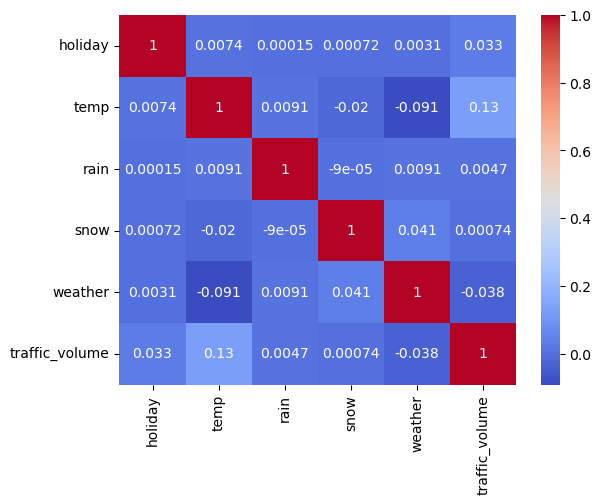

In [374]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
le = LabelEncoder()
data['holiday'] = le.fit_transform(data['holiday'].astype(str))
data['weather'] = le.fit_transform(data['weather'].astype(str))

# Compute correlation matrix
cor = data[['holiday', 'temp', 'rain', 'snow', 'weather', 'traffic_volume']].corr()

# Plot heatmap
sns.heatmap(cor, annot=True, cmap="coolwarm")
plt.show()

In [375]:
cor


,holiday,temp,rain,snow,weather,traffic_volume
holiday,1.000000,0.007352,0.000154,0.000716,0.003062,0.032722
temp,0.007352,1.000000,0.009070,-0.019758,-0.090564,0.130034
rain,0.000154,0.009070,1.000000,-0.000090,0.009089,0.004714
snow,0.000716,-0.019758,-0.000090,1.000000,0.041101,0.000735
weather,0.003062,-0.090564,0.009089,0.041101,1.000000,-0.038168
traffic_volume,0.032722,0.130034,0.004714,0.000735,-0.038168,1.000000


<Axes: >

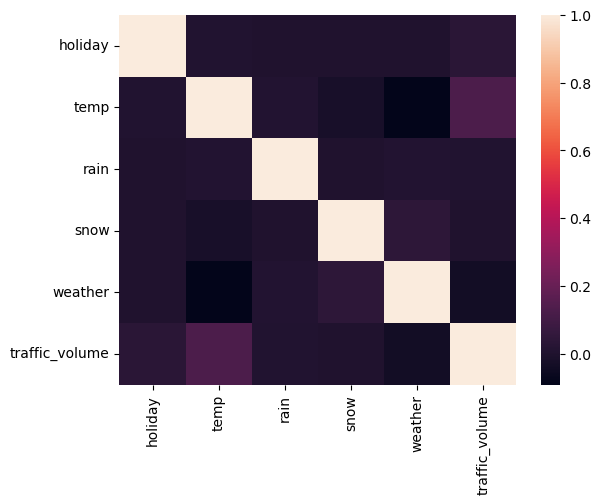

In [376]:
sns.heatmap(cor)

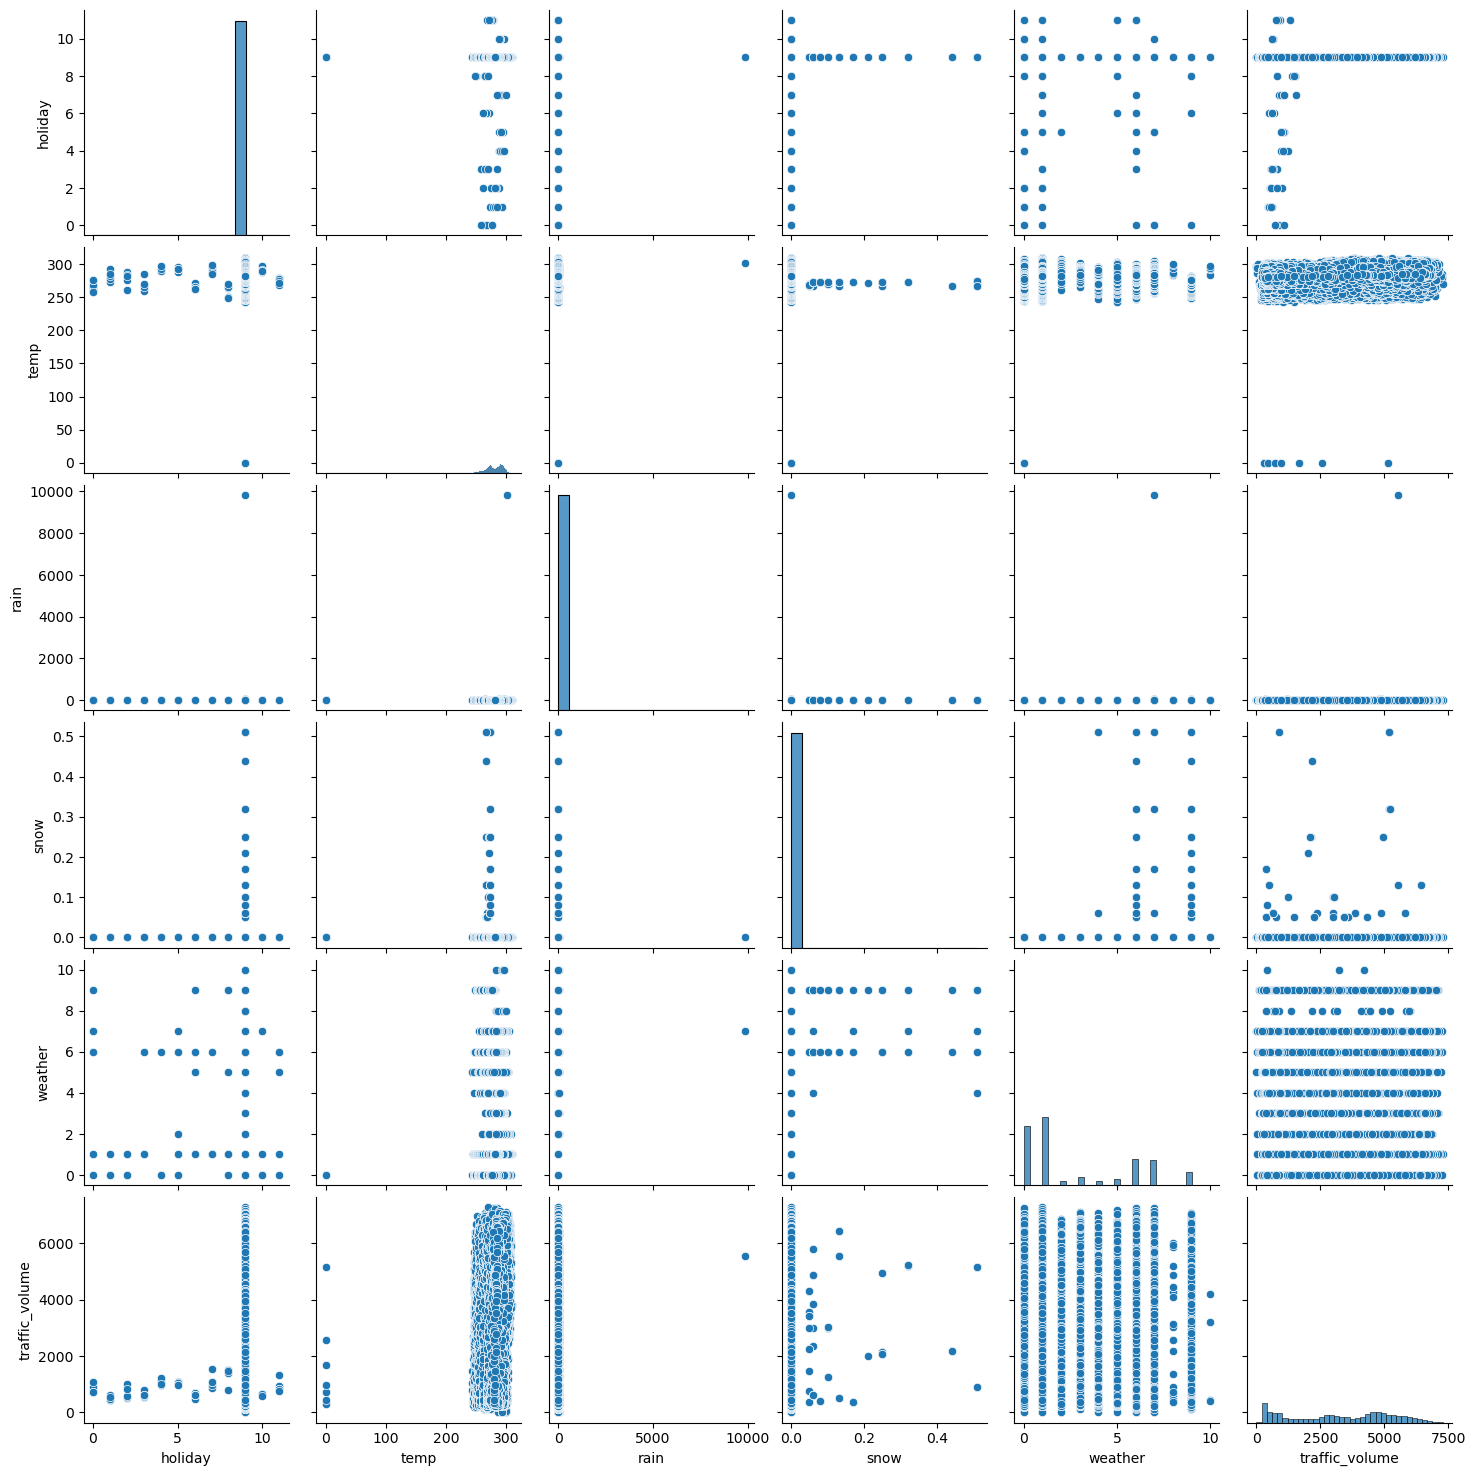

In [377]:
sns.pairplot(data)

<Axes: >

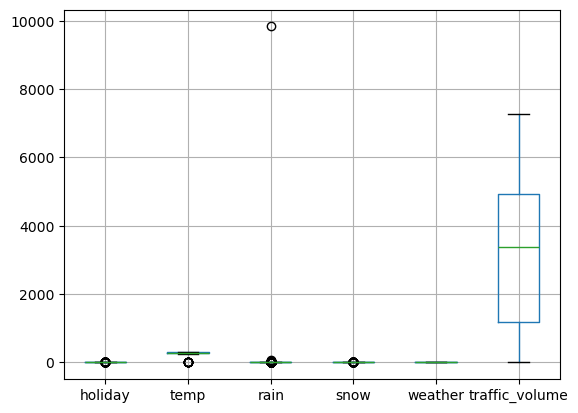

In [378]:
data.boxplot()

In [379]:
data[["day","month","year",]]=data["date"].str.split("-",expand=True)

In [380]:
data[["hours","minutes","seconds"]]=data["Time"].str.split(":",expand=True)

In [381]:
data.drop(columns=['date','Time'],axis=1,inplace=True)

In [382]:
data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,9,288.28,0.0,0.0,1,5545,02,10,2012,09,00,00
1,9,289.36,0.0,0.0,1,4516,02,10,2012,10,00,00
2,9,289.58,0.0,0.0,1,4767,02,10,2012,11,00,00
3,9,290.13,0.0,0.0,1,5026,02,10,2012,12,00,00
4,9,291.14,0.0,0.0,1,4918,02,10,2012,13,00,00


In [383]:
y=data['traffic_volume']
x=data.drop(columns=['traffic_volume'],axis=1)

In [384]:
names=x.columns

In [385]:
from sklearn.preprocessing import StandardScaler


In [386]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [387]:
x=pd.DataFrame(x,columns=names)

In [388]:
x.head()

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,seconds
0,0.026274,0.530485,-0.007463,-0.027235,-0.596336,-1.574903,1.02758,-1.855294,-0.345548,0.0,0.0
1,0.026274,0.611467,-0.007463,-0.027235,-0.596336,-1.574903,1.02758,-1.855294,-0.201459,0.0,0.0
2,0.026274,0.627964,-0.007463,-0.027235,-0.596336,-1.574903,1.02758,-1.855294,-0.057371,0.0,0.0
3,0.026274,0.669205,-0.007463,-0.027235,-0.596336,-1.574903,1.02758,-1.855294,0.086718,0.0,0.0
4,0.026274,0.744939,-0.007463,-0.027235,-0.596336,-1.574903,1.02758,-1.855294,0.230807,0.0,0.0


In [389]:
from sklearn.model_selection import train_test_split

In [390]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [391]:
#Training and testing the model
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost


In [392]:
lin_reg=linear_model.LinearRegression()
Dtree=tree.DecisionTreeRegressor()
Rand=ensemble.RandomForestRegressor()
svr=svm.SVR()
XGB=xgboost.XGBRegressor()

In [393]:
print(x_train.shape, y_train.shape)
print(x_train.isnull().sum())
print(y_train.isnull().sum())

(38563, 11) (38563,)
holiday    0
temp       0
rain       0
snow       0
weather    0
day        0
month      0
year       0
hours      0
minutes    0
seconds    0
dtype: int64
0


In [394]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [395]:
Dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [396]:
from sklearn.ensemble import RandomForestRegressor

Rand = RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)
Rand.fit(x_train, y_train)  # Use full or sliced data

RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)

In [397]:
from sklearn.svm import SVR

svr = SVR(kernel='linear', C=1.0, epsilon=0.1)  # Light and fast
svr.fit(x_train[:1000], y_train[:1000])         # Use fewer rows for performance

SVR(kernel='linear')

In [398]:
from xgboost import XGBRegressor

XGB = XGBRegressor(n_estimators=50, learning_rate=0.1, n_jobs=-1, verbosity=1, random_state=42)
XGB.fit(x_train[:1000], y_train[:1000])  # Use a slice if full data is slow

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=50,
             n_jobs=-1, num_parallel_tree=None, ...)

In [399]:
p1=lin_reg.predict(x_train)

In [400]:
p2=Dtree.predict(x_train)

In [401]:
p3=Rand.predict(x_train)

In [402]:
p4=svr.predict(x_train)

In [403]:
p5=XGB.predict(x_train)

In [404]:
from sklearn import metrics

In [405]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (38563, 11)
y_train shape: (38563,)


In [406]:
print(metrics.r2_score(p1,y_train))
print(metrics.r2_score(p2,y_train))
print(metrics.r2_score(p3,y_train))
print(metrics.r2_score(p4,y_train))
print(metrics.r2_score(p5,y_train))

-5.523353999670362
1.0
0.9740507802878808
-68.64099714036666
0.6914032697677612


In [407]:
p1=lin_reg.predict(x_test)

In [408]:
p2=Dtree.predict(x_test)

In [409]:
p3=Rand.predict(x_test)

In [410]:
p4=svr.predict(x_test)

In [411]:
p5=XGB.predict(x_test)

In [412]:
print(metrics.r2_score(p1,y_test))
print(metrics.r2_score(p2,y_test))
print(metrics.r2_score(p3,y_test))
print(metrics.r2_score(p4,y_test))
print(metrics.r2_score(p5,y_test))

-5.391950377351249
0.7037908741919146
0.8024025412519122
-67.94789306907215
0.6877449750900269


In [413]:
MSE=metrics.mean_squared_error(p3,y_test)

In [414]:
np.sqrt(MSE)

np.float64(800.5160453905372)

In [415]:
import pickle

In [416]:
pickle.dump(Rand,open("model.pkl",'wb'))

In [417]:
pickle.dump(le,open("encoder.pkl",'wb'))

In [418]:
pickle.dump(scaler,open("scaler.pkl",'wb'))